# bussiness Objective
 
* This project aims to analyze bank customer data to identify patterns and factors that indicate whether a client may face difficulties in repaying their installments. Using exploratory data analysis (EDA) and predictive modeling, the project helps uncover key driver variables that strongly influence loan default risk.

* The insights and prediction models can be used to make informed lending decisions, such as rejecting high-risk applicants, adjusting loan amounts, or setting higher interest rates for risky customers. This ensures that creditworthy customers are not wrongly denied loans and the bank can better manage its risk portfolio.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import missingno as mn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv(r"C:\Users\gagan soni\Downloads\application_data.csv.zip")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

<Figure size 200x1200 with 0 Axes>

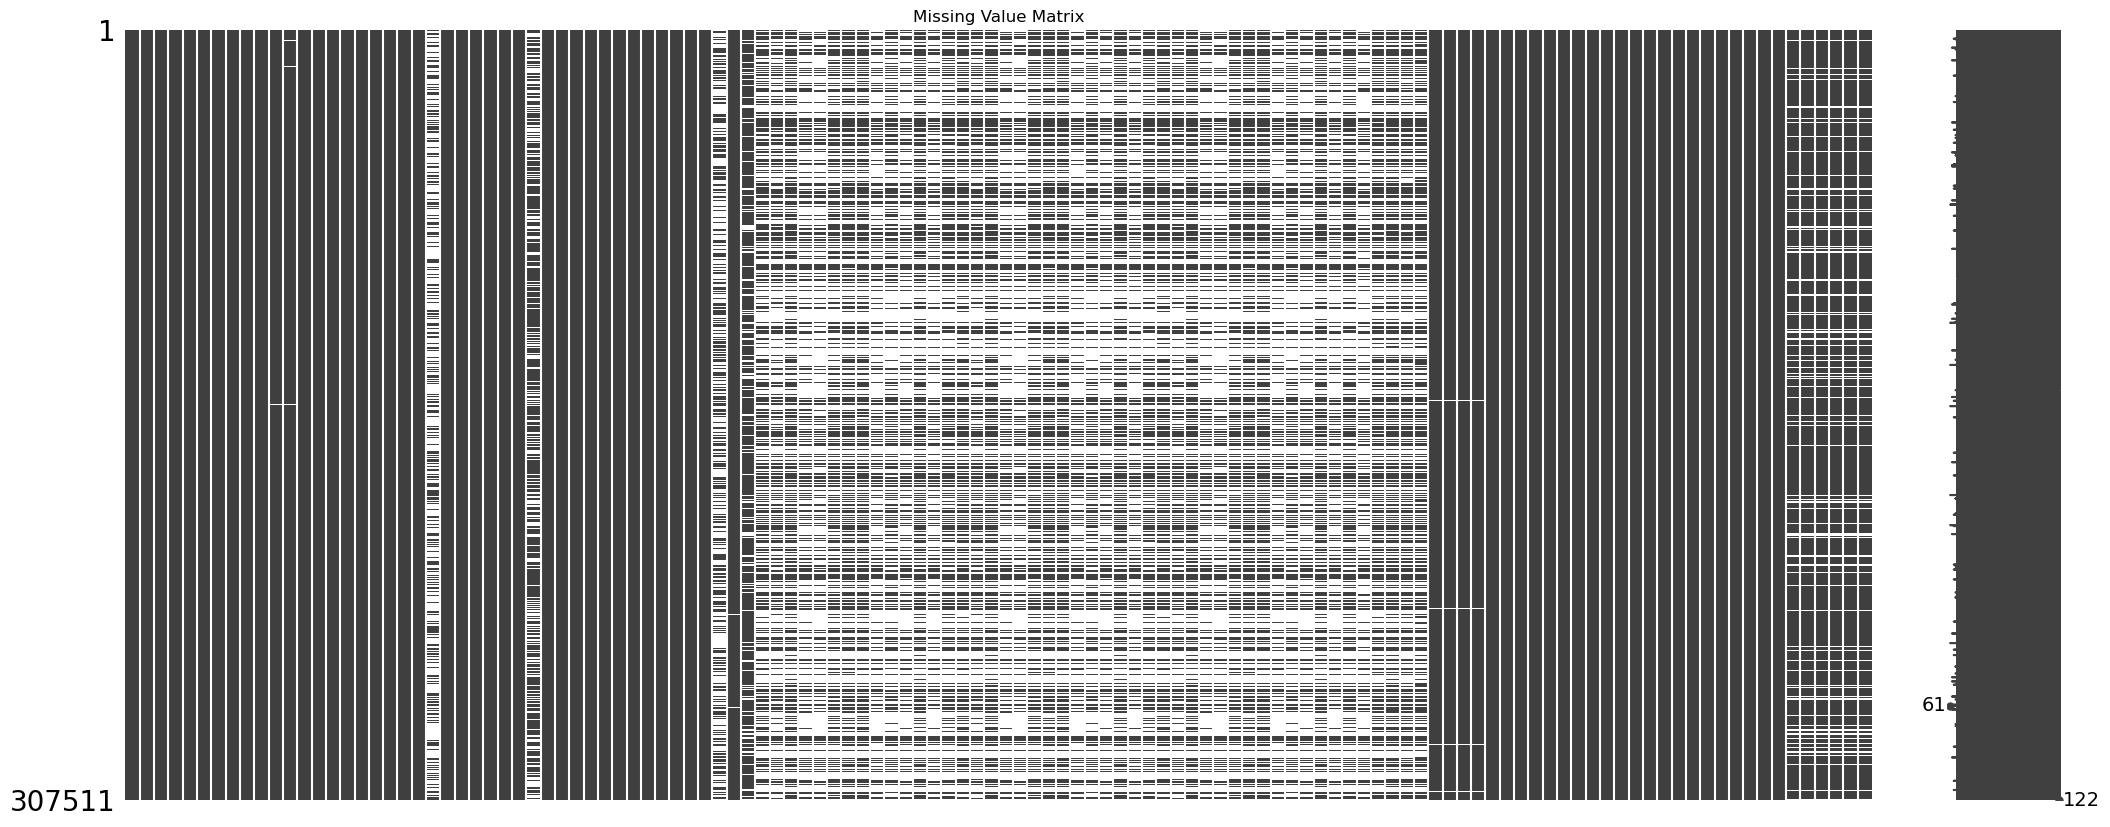

In [4]:
plt.figure(figsize = (2,12))
mn.matrix(df)
plt.title('Missing Value Matrix')
plt.show()

- there are multiple columns which have have 30 % missing value like see so we have to delete that particular columns

In [5]:
x = round(df.isnull().sum()* 100 /len(df),2).reset_index()
x.rename(columns = {'index':'columns',0:'missing_vlaue_p'},inplace = True)

In [6]:
y =x[x['missing_vlaue_p']>30]
z= y['columns'].to_list()

In [7]:
df.drop(columns = z,inplace = True)

- i delete that colums which have 30% > missing values

In [8]:
df.sample(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
254055,393981,0,Cash loans,M,Y,Y,3,135000.0,389844.0,21276.0,315000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.005144,-16128,-173,-6138.0,-5068,1,1,1,1,1,0,5.0,2,2,MONDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.473261,0.417100,0.0,0.0,0.0,0.0,-2571.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
158031,283189,0,Cash loans,M,N,Y,0,67500.0,119925.0,13045.5,112500.0,Group of people,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007330,-17158,-121,-685.0,-713,1,1,0,1,0,0,2.0,2,2,THURSDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.606675,0.812823,0.0,0.0,0.0,0.0,-528.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
214403,348444,0,Cash loans,M,Y,Y,0,315000.0,755190.0,52690.5,675000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.072508,-13521,-458,-7621.0,-4370,1,1,0,1,1,0,2.0,1,1,SUNDAY,11,0,0,0,0,0,0,Business Entity Type 1,0.535134,0.581484,0.0,0.0,0.0,0.0,-302.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,3.0


In [9]:
df.shape

(307511, 72)

In [10]:
df.size

22140792

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [12]:
df.SK_ID_CURR.unique()

array([100002, 100003, 100004, ..., 456253, 456254, 456255], dtype=int64)

In [13]:
df.drop(columns = 'SK_ID_CURR',inplace = True)

In [14]:
df.FLAG_DOCUMENT_3.value_counts()

FLAG_DOCUMENT_3
1    218340
0     89171
Name: count, dtype: int64

In [15]:
df.shape

(307511, 71)

In [16]:
df.REG_REGION_NOT_LIVE_REGION.unique()

array([0, 1], dtype=int64)

In [17]:
df.REG_REGION_NOT_LIVE_REGION.value_counts()

REG_REGION_NOT_LIVE_REGION
0    302854
1      4657
Name: count, dtype: int64

In [18]:
df.HOUR_APPR_PROCESS_START.unique()

array([10, 11,  9, 17, 16, 14,  8, 15,  7, 13,  6, 12, 19,  3, 18, 21,  4,
        5, 20, 22,  1,  2, 23,  0], dtype=int64)

In [19]:
df.CNT_FAM_MEMBERS.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  9.,  7.,  8., 10., 13., nan, 14.,
       12., 20., 15., 16., 11.])

In [20]:
df.FLAG_MOBIL.unique()

array([1, 0], dtype=int64)

In [21]:
df.FLAG_MOBIL.value_counts()

FLAG_MOBIL
1    307510
0         1
Name: count, dtype: int64

In [22]:
df.TARGET.unique()

array([1, 0], dtype=int64)

In [23]:
df.TARGET.value_counts()*100/len(df)

TARGET
0    91.927118
1     8.072882
Name: count, dtype: float64

In [24]:
df.DEF_30_CNT_SOCIAL_CIRCLE.unique()

array([ 2.,  0.,  1., nan,  3.,  4.,  5.,  6.,  7., 34.,  8.])

- threre are one outlire along with nan values a

In [25]:
df.DEF_30_CNT_SOCIAL_CIRCLE.value_counts()

DEF_30_CNT_SOCIAL_CIRCLE
0.0     271324
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
34.0         1
8.0          1
Name: count, dtype: int64

- most of the people which are not intrested to give the information about this 

In [26]:
df.OBS_30_CNT_SOCIAL_CIRCLE.unique()

array([  2.,   1.,   0.,   4.,   8.,  10.,  nan,   7.,   3.,   6.,   5.,
        12.,   9.,  13.,  11.,  14.,  22.,  16.,  15.,  17.,  20.,  25.,
        19.,  18.,  21.,  24.,  23.,  28.,  26.,  29.,  27.,  47., 348.,
        30.])

- there are outlire along with unique values 

In [27]:
df.OBS_30_CNT_SOCIAL_CIRCLE.value_counts().tail()

OBS_30_CNT_SOCIAL_CIRCLE
30.0     2
28.0     1
29.0     1
47.0     1
348.0    1
Name: count, dtype: int64

### discrete categorical 

In [28]:
df.ORGANIZATION_TYPE.unique() # some wrong data is avaliable 

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

- there wrong data which is xna

In [29]:
df.ORGANIZATION_TYPE.value_counts().head(8)  #Customer kis prakar ki organization mein kaam karta hai

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Name: count, dtype: int64

In [30]:
df.WEEKDAY_APPR_PROCESS_START.unique()

array(['WEDNESDAY', 'MONDAY', 'THURSDAY', 'SUNDAY', 'SATURDAY', 'FRIDAY',
       'TUESDAY'], dtype=object)

In [31]:
df.WEEKDAY_APPR_PROCESS_START.value_counts()

WEEKDAY_APPR_PROCESS_START
TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: count, dtype: int64

- there are not missing values even not wrong data

In [32]:
df.NAME_HOUSING_TYPE.unique()

array(['House / apartment', 'Rented apartment', 'With parents',
       'Municipal apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

In [33]:
df.NAME_HOUSING_TYPE.value_counts() #Customer ka ghar kis type ka hai

NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64

- most of the people live in theappartments

In [34]:
df.NAME_FAMILY_STATUS.unique() # some qrong data is here 

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated', 'Unknown'], dtype=object)

- there are some wrong data which is very less 

In [35]:
df.NAME_FAMILY_STATUS.value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

In [36]:
df.NAME_EDUCATION_TYPE.unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [37]:
df.NAME_EDUCATION_TYPE.value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

-most of the people which is done his secondary speccial

In [38]:
df.NAME_INCOME_TYPE.unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [39]:
df.NAME_INCOME_TYPE.value_counts() #Customer ki income ka source kya ha

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

In [40]:
df.NAME_TYPE_SUITE.unique() 

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [41]:
df.NAME_TYPE_SUITE.value_counts() #  ➔ Jab applicant loan lene bank gaya tha, tab kaun-kaun uske saath tha.

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [42]:
df.CNT_CHILDREN.unique()

array([ 0,  1,  2,  3,  4,  7,  5,  6,  8,  9, 11, 12, 10, 19, 14],
      dtype=int64)

In [43]:
df.FLAG_OWN_REALTY.unique()

array(['Y', 'N'], dtype=object)

In [44]:
df.FLAG_OWN_REALTY.value_counts()

FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64

In [45]:
df.FLAG_OWN_CAR.unique()

array(['N', 'Y'], dtype=object)

In [46]:
df.FLAG_OWN_CAR.value_counts()

FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

In [47]:
df.CODE_GENDER.unique() # there are some wrong data 

array(['M', 'F', 'XNA'], dtype=object)

In [48]:
df.CODE_GENDER.value_counts() 

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [49]:
df.NAME_CONTRACT_TYPE.unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

- most of the people intrested to take cash loan 

In [50]:
df.FLAG_MOBIL.unique()

array([1, 0], dtype=int64)

In [51]:
df.FLAG_CONT_MOBILE.unique()

array([1, 0], dtype=int64)

In [52]:
df.CNT_FAM_MEMBERS.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  9.,  7.,  8., 10., 13., nan, 14.,
       12., 20., 15., 16., 11.])

In [53]:
df.REGION_RATING_CLIENT.unique()

array([2, 1, 3], dtype=int64)

In [54]:
df.REGION_RATING_CLIENT_W_CITY.unique()

array([2, 1, 3], dtype=int64)

In [55]:
df.WEEKDAY_APPR_PROCESS_START.unique()

array(['WEDNESDAY', 'MONDAY', 'THURSDAY', 'SUNDAY', 'SATURDAY', 'FRIDAY',
       'TUESDAY'], dtype=object)

In [56]:
df.HOUR_APPR_PROCESS_START.unique()

array([10, 11,  9, 17, 16, 14,  8, 15,  7, 13,  6, 12, 19,  3, 18, 21,  4,
        5, 20, 22,  1,  2, 23,  0], dtype=int64)

In [57]:
df.LIVE_CITY_NOT_WORK_CITY.unique()

array([0, 1], dtype=int64)

In [58]:
df.REG_CITY_NOT_WORK_CITY.unique()

array([0, 1], dtype=int64)

In [59]:
df.REG_CITY_NOT_LIVE_CITY.unique()

array([0, 1], dtype=int64)

In [60]:
df.LIVE_REGION_NOT_WORK_REGION.unique()

array([0, 1], dtype=int64)

In [61]:
df.REG_REGION_NOT_WORK_REGION.unique()

array([0, 1], dtype=int64)

In [62]:
df.REG_REGION_NOT_LIVE_REGION.unique()

array([0, 1], dtype=int64)

In [63]:
df.ORGANIZATION_TYPE.unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [64]:
df.DEF_60_CNT_SOCIAL_CIRCLE.unique()

array([ 2.,  0.,  1., nan,  3.,  5.,  4.,  7., 24.,  6.])

In [65]:
df.DEF_30_CNT_SOCIAL_CIRCLE.unique()

array([ 2.,  0.,  1., nan,  3.,  4.,  5.,  6.,  7., 34.,  8.])

In [66]:
df.OBS_60_CNT_SOCIAL_CIRCLE.unique()

array([  2.,   1.,   0.,   4.,   8.,  10.,  nan,   7.,   3.,   6.,   5.,
        12.,   9.,  13.,  11.,  14.,  21.,  15.,  22.,  16.,  20.,  25.,
        17.,  19.,  18.,  24.,  23.,  28.,  29.,  27.,  47., 344.,  30.,
        26.])

In [67]:
df.OBS_30_CNT_SOCIAL_CIRCLE.unique()

array([  2.,   1.,   0.,   4.,   8.,  10.,  nan,   7.,   3.,   6.,   5.,
        12.,   9.,  13.,  11.,  14.,  22.,  16.,  15.,  17.,  20.,  25.,
        19.,  18.,  21.,  24.,  23.,  28.,  26.,  29.,  27.,  47., 348.,
        30.])

**we can drop the OBS_30 and OBS 30 because we have atchual data and also we drop DEF_60_CNT_SOCIAL_CIRCLE beause 30 day and 60 day no difference**

In [68]:
df.drop(columns = ['OBS_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'],inplace = True)

In [69]:
df.AMT_REQ_CREDIT_BUREAU_YEAR.unique()

array([ 1.,  0., nan,  2.,  4.,  5.,  3.,  8.,  6.,  9.,  7., 10., 11.,
       13., 16., 12., 25., 23., 15., 14., 22., 17., 19., 18., 21., 20.])

In [70]:
df.AMT_REQ_CREDIT_BUREAU_QRT.unique()

array([  0.,  nan,   1.,   2.,   4.,   3.,   8.,   5.,   6.,   7., 261.,
        19.])

In [71]:
df.AMT_REQ_CREDIT_BUREAU_MON.unique()

array([ 0., nan,  1.,  2.,  6.,  5.,  3.,  7.,  9.,  4., 11.,  8., 16.,
       12., 14., 10., 13., 17., 24., 19., 15., 23., 18., 27., 22.])

In [72]:
df.AMT_REQ_CREDIT_BUREAU_WEEK.unique()

array([ 0., nan,  1.,  3.,  2.,  4.,  5.,  6.,  8.,  7.])

In [73]:
df.AMT_REQ_CREDIT_BUREAU_DAY.unique()

array([ 0., nan,  1.,  3.,  2.,  4.,  5.,  6.,  9.,  8.])

In [74]:
df.AMT_REQ_CREDIT_BUREAU_HOUR.unique()

array([ 0., nan,  1.,  2.,  3.,  4.])

In [75]:
df.drop(columns = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
                   'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','WEEKDAY_APPR_PROCESS_START'],inplace = True)

**AMT_REQ_CREDIT_BUREAU_QRT are represent same data that is a reason we can drop remain columns** 

In [76]:
continious = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED',
              'DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE']

In [77]:
df[continious].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE
count,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,307510.000000
mean,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.063419,5.143927e-01,0.510853,-962.858788
std,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,3.265832,1.910602e-01,0.194844,826.808487
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,8.173617e-08,0.000527,-4292.000000
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,10.000000,3.924574e-01,0.370650,-1570.000000
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,12.000000,5.659614e-01,0.535276,-757.000000
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,14.000000,6.636171e-01,0.669057,-274.000000
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,23.000000,8.549997e-01,0.896010,0.000000


#  Data Preprocessing

### Standardize Values

In [78]:
date_col = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']

for col in date_col:
    df[col] = abs(df[col])

### identify unimportent columns

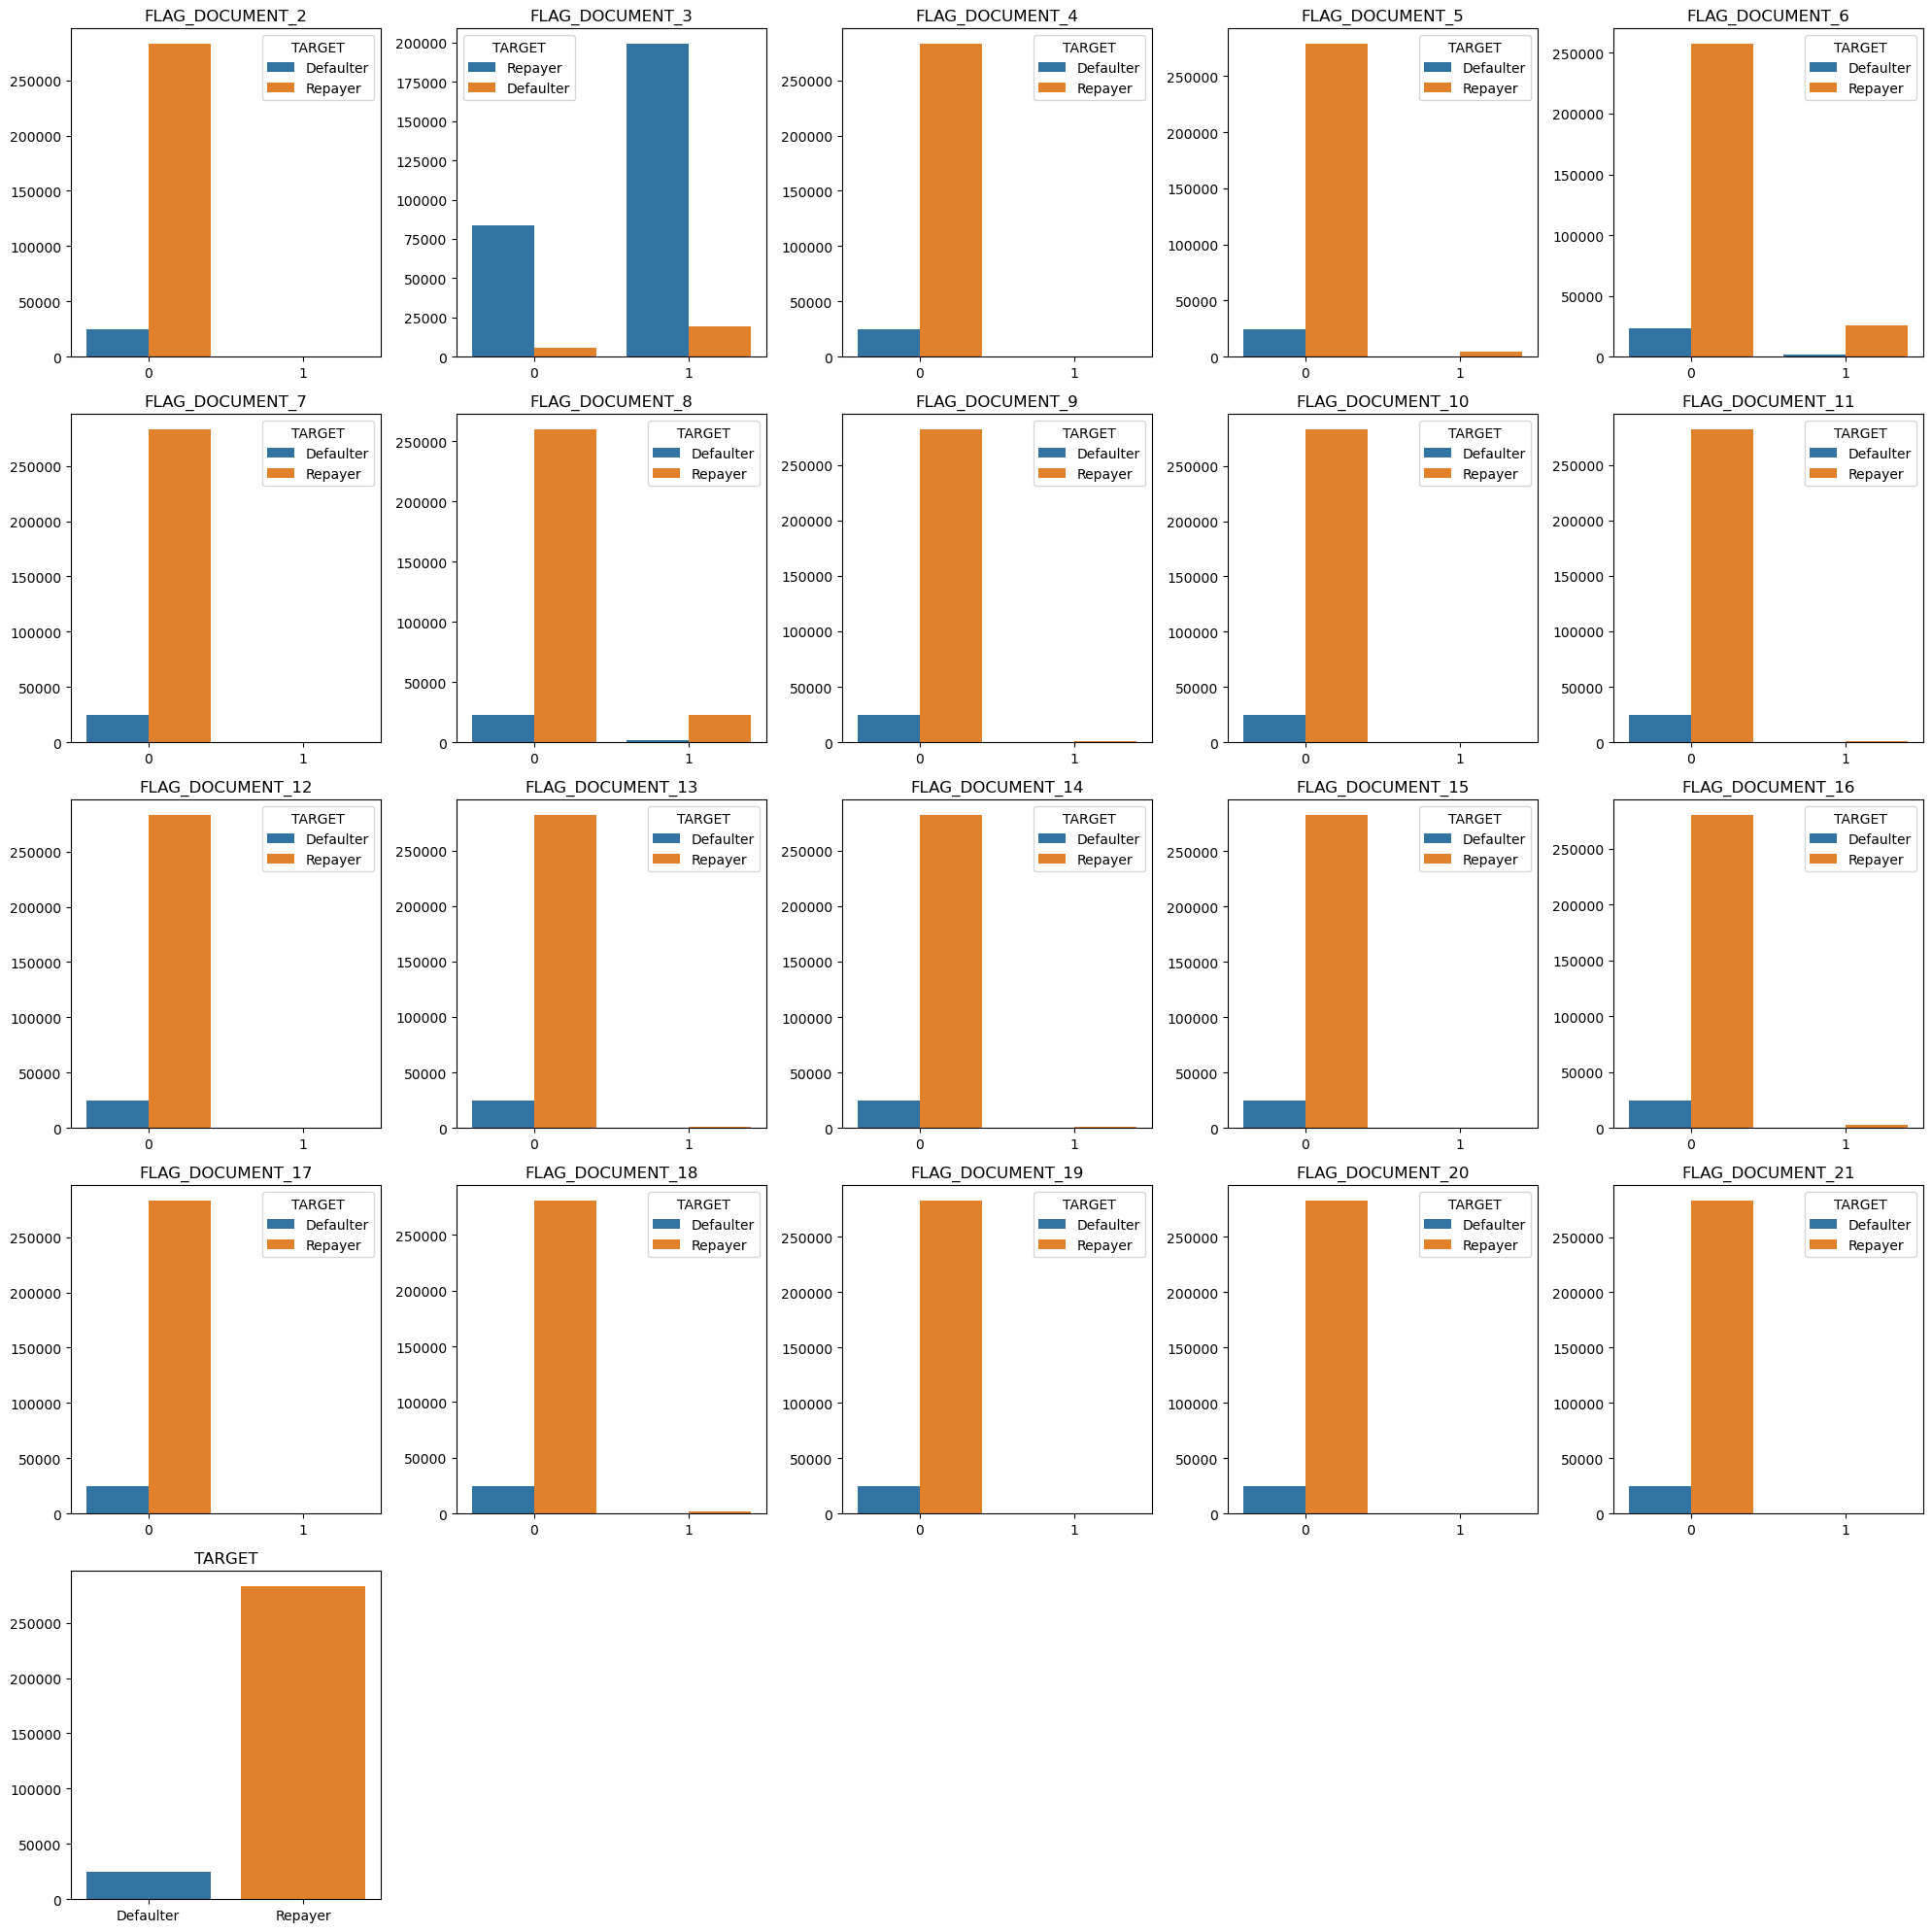

In [79]:
col_Doc = ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
                       'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
                       'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18',
                      'FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',]
df_flag = df[col_Doc + ['TARGET']]
df_flag['TARGET'] = df_flag['TARGET'].replace({1:"Defaulter",0:"Repayer"}) # converting temperory defaulter and repayer for comparision of documents
plt.figure(figsize=(20, 20)) 
for index,col in enumerate(df_flag):
    plt.subplot(5,5,index+1)
    sns.countplot(x = col  , hue = 'TARGET',data = df_flag)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()

In [80]:
col_Doc.remove('FLAG_DOCUMENT_3')

In [81]:
df.drop(columns = df[col_Doc],inplace = True)

*********clients who applied for loans has not submitted FLAG_DOCUMENT_X except FLAG_DOCUMENT_3. Thus, Except for FLAG_DOCUMENT_3, we can delete rest of the columns. Data shows if borrower has submitted FLAG_DOCUMENT_3 then there is a less chance of defaulting the loan*********

### Treat wrong data

In [82]:
df.ORGANIZATION_TYPE = df.ORGANIZATION_TYPE.replace ({'XNA':np.nan})
df.NAME_FAMILY_STATUS = df.NAME_FAMILY_STATUS.replace({'Unknown':np.nan})
df.CODE_GENDER = df.CODE_GENDER.replace({'XNA':np.nan})

### Treat missing values

In [83]:
df.dropna(subset=['AMT_ANNUITY'],inplace = True) 
df.dropna(subset=['AMT_GOODS_PRICE'],inplace = True)

In [84]:
df['CODE_GENDER'].fillna(df['CODE_GENDER'].mode()[0],inplace = True)
df['NAME_TYPE_SUITE'].fillna(df.NAME_TYPE_SUITE.mode()[0],inplace = True)

In [85]:
df['ORGANIZATION_TYPE'].fillna(df.ORGANIZATION_TYPE.mode()[0],inplace = True)
df['EXT_SOURCE_2'].fillna(df.EXT_SOURCE_2.median(),inplace = True)
df['EXT_SOURCE_3'].fillna(df.EXT_SOURCE_3.mean(),inplace = True)
df['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(df.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True)
df['DAYS_LAST_PHONE_CHANGE'].fillna(df.DAYS_LAST_PHONE_CHANGE.median(),inplace = True)
df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(df.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0],inplace = True)

### Treat wrong data type

In [86]:
df.head(2)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,1134.0,1,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,School,0.622246,0.510885,0.0,828.0,1,0.0


In [87]:
df.DAYS_REGISTRATION = df.DAYS_REGISTRATION.astype(int)
df.CNT_FAM_MEMBERS = df.CNT_FAM_MEMBERS.astype(int)
df.DEF_30_CNT_SOCIAL_CIRCLE = df.DEF_30_CNT_SOCIAL_CIRCLE.astype(int)
df.DAYS_LAST_PHONE_CHANGE = df.DAYS_LAST_PHONE_CHANGE.astype(int)
df.AMT_REQ_CREDIT_BUREAU_YEAR = df.AMT_REQ_CREDIT_BUREAU_YEAR.astype(int)

### Duplicates

In [88]:
df.duplicated().sum()

0

### Treat Outlire

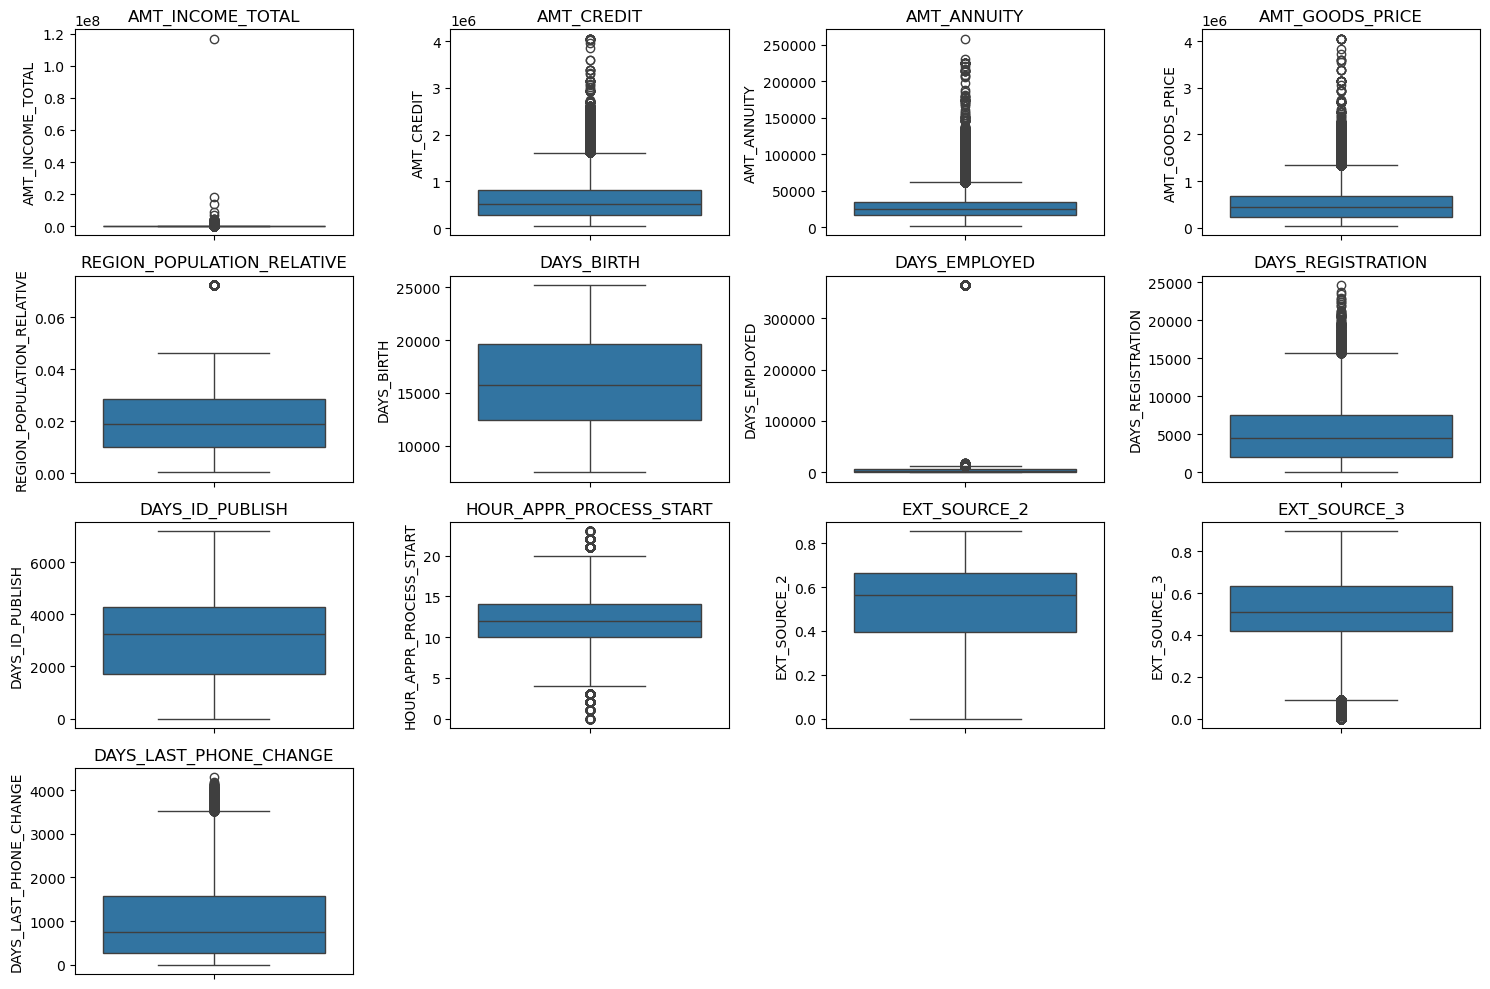

In [89]:
plt.figure(figsize = (15,10))
for index,i in enumerate(continious):
    plt.subplot(4,4,index+1)
    sns.boxplot(df[i])
    plt.title(i)
plt.tight_layout()
plt.show() 

In [90]:
df[continious].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE
count,3.072210e+05,3.072210e+05,307221.000000,3.072210e+05,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,3.072210e+05,307221.000000,307221.000000
mean,1.688326e+05,5.993163e+05,27120.452357,5.383973e+05,0.020870,16038.787130,67760.549399,4986.328060,2994.384228,12.063020,5.145019e-01,0.510885,962.884826
std,2.372199e+05,4.025196e+05,14492.106811,3.694484e+05,0.013832,4363.852714,139473.407413,3523.139489,1509.381616,3.265941,1.908803e-01,0.174472,826.922287
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000
25%,1.125000e+05,2.700000e+05,16551.000000,2.385000e+05,0.010006,12415.000000,933.000000,2010.000000,1720.000000,10.000000,3.929372e-01,0.417100,274.000000
50%,1.485000e+05,5.146020e+05,24916.500000,4.500000e+05,0.018850,15753.000000,2219.000000,4504.000000,3255.000000,12.000000,5.659722e-01,0.510885,757.000000
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19684.000000,5711.000000,7480.000000,4299.000000,14.000000,6.634316e-01,0.636376,1570.000000
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,24672.000000,7197.000000,23.000000,8.549997e-01,0.896010,4292.000000


In [91]:
df.sort_values('AMT_INCOME_TOTAL',ascending = False).head(3)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_YEAR
12840,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,12615,922,6762,3643,1,1,0,1,0,0,3,2,2,14,0,0,0,0,0,0,Business Entity Type 3,0.113161,0.145543,0,0,1,1
203693,0,Cash loans,M,Y,Y,2,18000090.0,675000.0,69295.5,675000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.030755,15704,4961,3338,4728,1,1,0,1,0,0,4,2,2,22,0,0,0,0,0,0,Business Entity Type 3,0.788606,0.510885,0,1133,1,0
246858,0,Cash loans,M,Y,Y,0,13500000.0,1400503.5,130945.5,1368000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.030755,13551,280,3953,4972,1,1,1,1,0,0,2,2,2,12,0,0,0,0,0,0,Business Entity Type 3,0.713507,0.510885,0,13,0,0


In [92]:
df.loc[12840,'AMT_INCOME_TOTAL'] = 11700000 

**based on the Observation of the data i replace it with org value because its most one outlire remaining columns dont have outlire these are origional values**

In [93]:
df[continious].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE
count,3.072210e+05,3.072210e+05,307221.000000,3.072210e+05,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,307221.000000,3.072210e+05,307221.000000,307221.000000
mean,1.684898e+05,5.993163e+05,27120.452357,5.383973e+05,0.020870,16038.787130,67760.549399,4986.328060,2994.384228,12.063020,5.145019e-01,0.510885,962.884826
std,1.108009e+05,4.025196e+05,14492.106811,3.694484e+05,0.013832,4363.852714,139473.407413,3523.139489,1509.381616,3.265941,1.908803e-01,0.174472,826.922287
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000
25%,1.125000e+05,2.700000e+05,16551.000000,2.385000e+05,0.010006,12415.000000,933.000000,2010.000000,1720.000000,10.000000,3.929372e-01,0.417100,274.000000
50%,1.485000e+05,5.146020e+05,24916.500000,4.500000e+05,0.018850,15753.000000,2219.000000,4504.000000,3255.000000,12.000000,5.659722e-01,0.510885,757.000000
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19684.000000,5711.000000,7480.000000,4299.000000,14.000000,6.634316e-01,0.636376,1570.000000
max,1.800009e+07,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,24672.000000,7197.000000,23.000000,8.549997e-01,0.896010,4292.000000


In [94]:
df[['AMT_INCOME_TOTAL','AMT_CREDIT']].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT
count,3.072210e+05,3.072210e+05
mean,1.684898e+05,5.993163e+05
std,1.108009e+05,4.025196e+05
min,2.565000e+04,4.500000e+04
25%,1.125000e+05,2.700000e+05
50%,1.485000e+05,5.146020e+05
75%,2.025000e+05,8.086500e+05
max,1.800009e+07,4.050000e+06


In [95]:
df['INCOME_Range'] = pd.qcut(df['AMT_INCOME_TOTAL'], q=5,
                                 labels=['Very Low Income', 'Low Income', 'Middle Income', 'High Income', 'Very High Income'])

# Credit: Divide into 5 quantile-based bins
df['CREDIT_RANGE'] = pd.qcut(df['AMT_CREDIT'], q=5,
                                 labels=['Very Low Credit', 'Low Credit', 'Middle Credit', 'High Credit', 'Very High Credit'])


In [96]:
df.rename(columns={'DAYS_BIRTH': 'AGE'}, inplace=True)

In [97]:
df['AGE'] = round(df['AGE']/365,1)

In [98]:
bins = [19, 30, 50, 70]  

labels = ['Young', 'Middle_aged', 'Senior']

# Use pd.cut to create a new column
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels, include_lowest=True)


In [99]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_Range,CREDIT_RANGE,AGE_GROUP
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.9,637,3648,2120,1,1,0,1,1,0,1,2,2,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2,1134,1,1,High Income,Low Credit,Young
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.9,1188,1186,291,1,1,0,1,1,0,2,1,1,11,0,0,0,0,0,0,School,0.622246,0.510885,0,828,1,0,Very High Income,Very High Credit,Middle_aged
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.2,225,4260,2531,1,1,1,1,1,0,1,2,2,9,0,0,0,0,0,0,Government,0.555912,0.729567,0,815,0,0,Very Low Income,Very Low Credit,Senior
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.1,3039,9833,2437,1,1,0,1,0,0,2,2,2,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510885,0,617,1,0,Low Income,Low Credit,Senior
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.6,3038,4311,3458,1,1,0,1,0,0,1,2,2,11,0,0,0,0,1,1,Religion,0.322738,0.510885,0,1106,0,0,Low Income,Middle Credit,Senior


In [100]:
count = ['DAYS_EMPLOYED','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',]
continious = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE']
ordi = ['NAME_EDUCATION_TYPE']

In [101]:
# Custom order define karo
edu_order = ['Incomplete higher','Lower secondary','Secondary / secondary special', 'Higher education', 'Academic degree']
income_order = ['High Income', 'Very High Income', 'Very Low Income', 'Low Income', 'Middle Income']
credit_order = ['Low Credit', 'Very High Credit', 'Very Low Credit', 'Middle Credit', 'High Credit']
age_order = ['Young', 'Middle_aged', 'Senior']

# Encoding
df['NAME_EDUCATION_TYPE'] = pd.Categorical(df['NAME_EDUCATION_TYPE'], categories=edu_order, ordered=True).codes
df['INCOME_Range'] = pd.Categorical(df['INCOME_Range'], categories=income_order, ordered=True).codes
df['CREDIT_RANGE'] = pd.Categorical(df['CREDIT_RANGE'], categories=credit_order, ordered=True).codes
df['AGE_GROUP'] = pd.Categorical(df['AGE_GROUP'], categories=age_order, ordered=True).codes

In [102]:
df[continious].skew()

AMT_INCOME_TOTAL    29.239869
AMT_CREDIT           1.234116
AMT_ANNUITY          1.580199
AMT_GOODS_PRICE      1.348996
AGE                  0.115334
dtype: float64

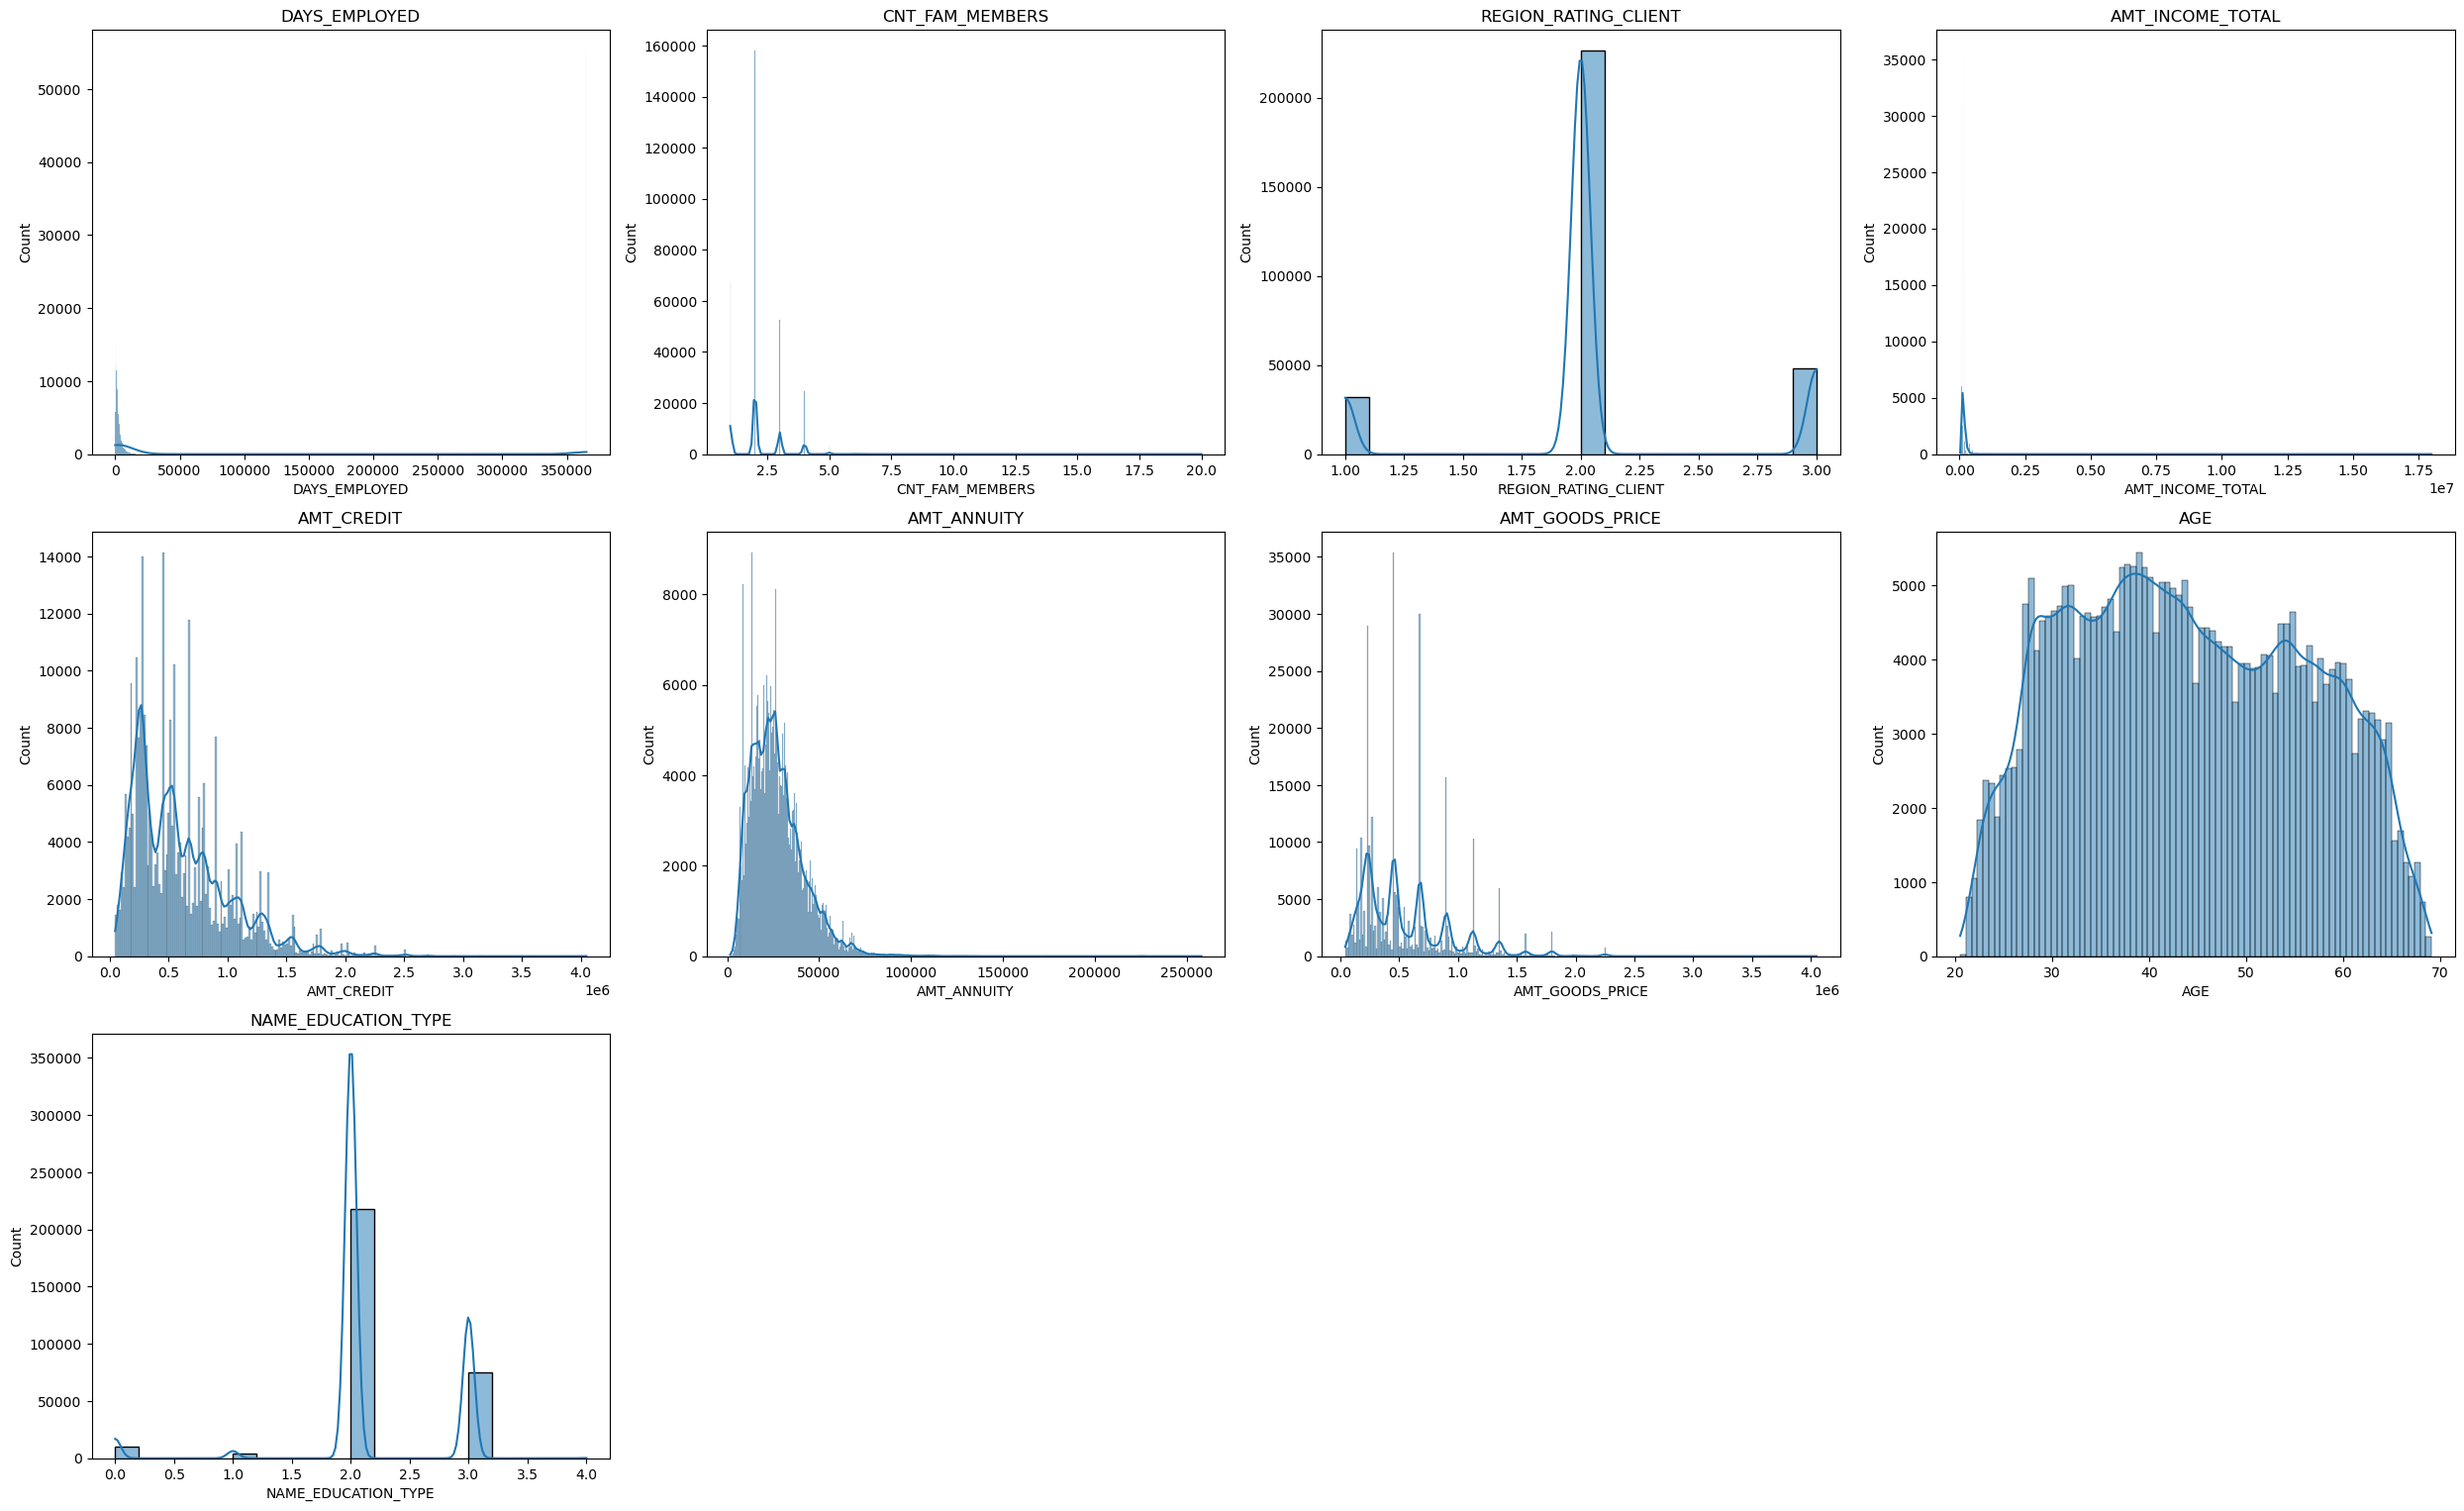

In [103]:
plt.figure(figsize=(25, 20))

all_cols = count + continious + ordi

for index, col in enumerate(all_cols):
    plt.subplot(4, 4, index + 1)   
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show() 

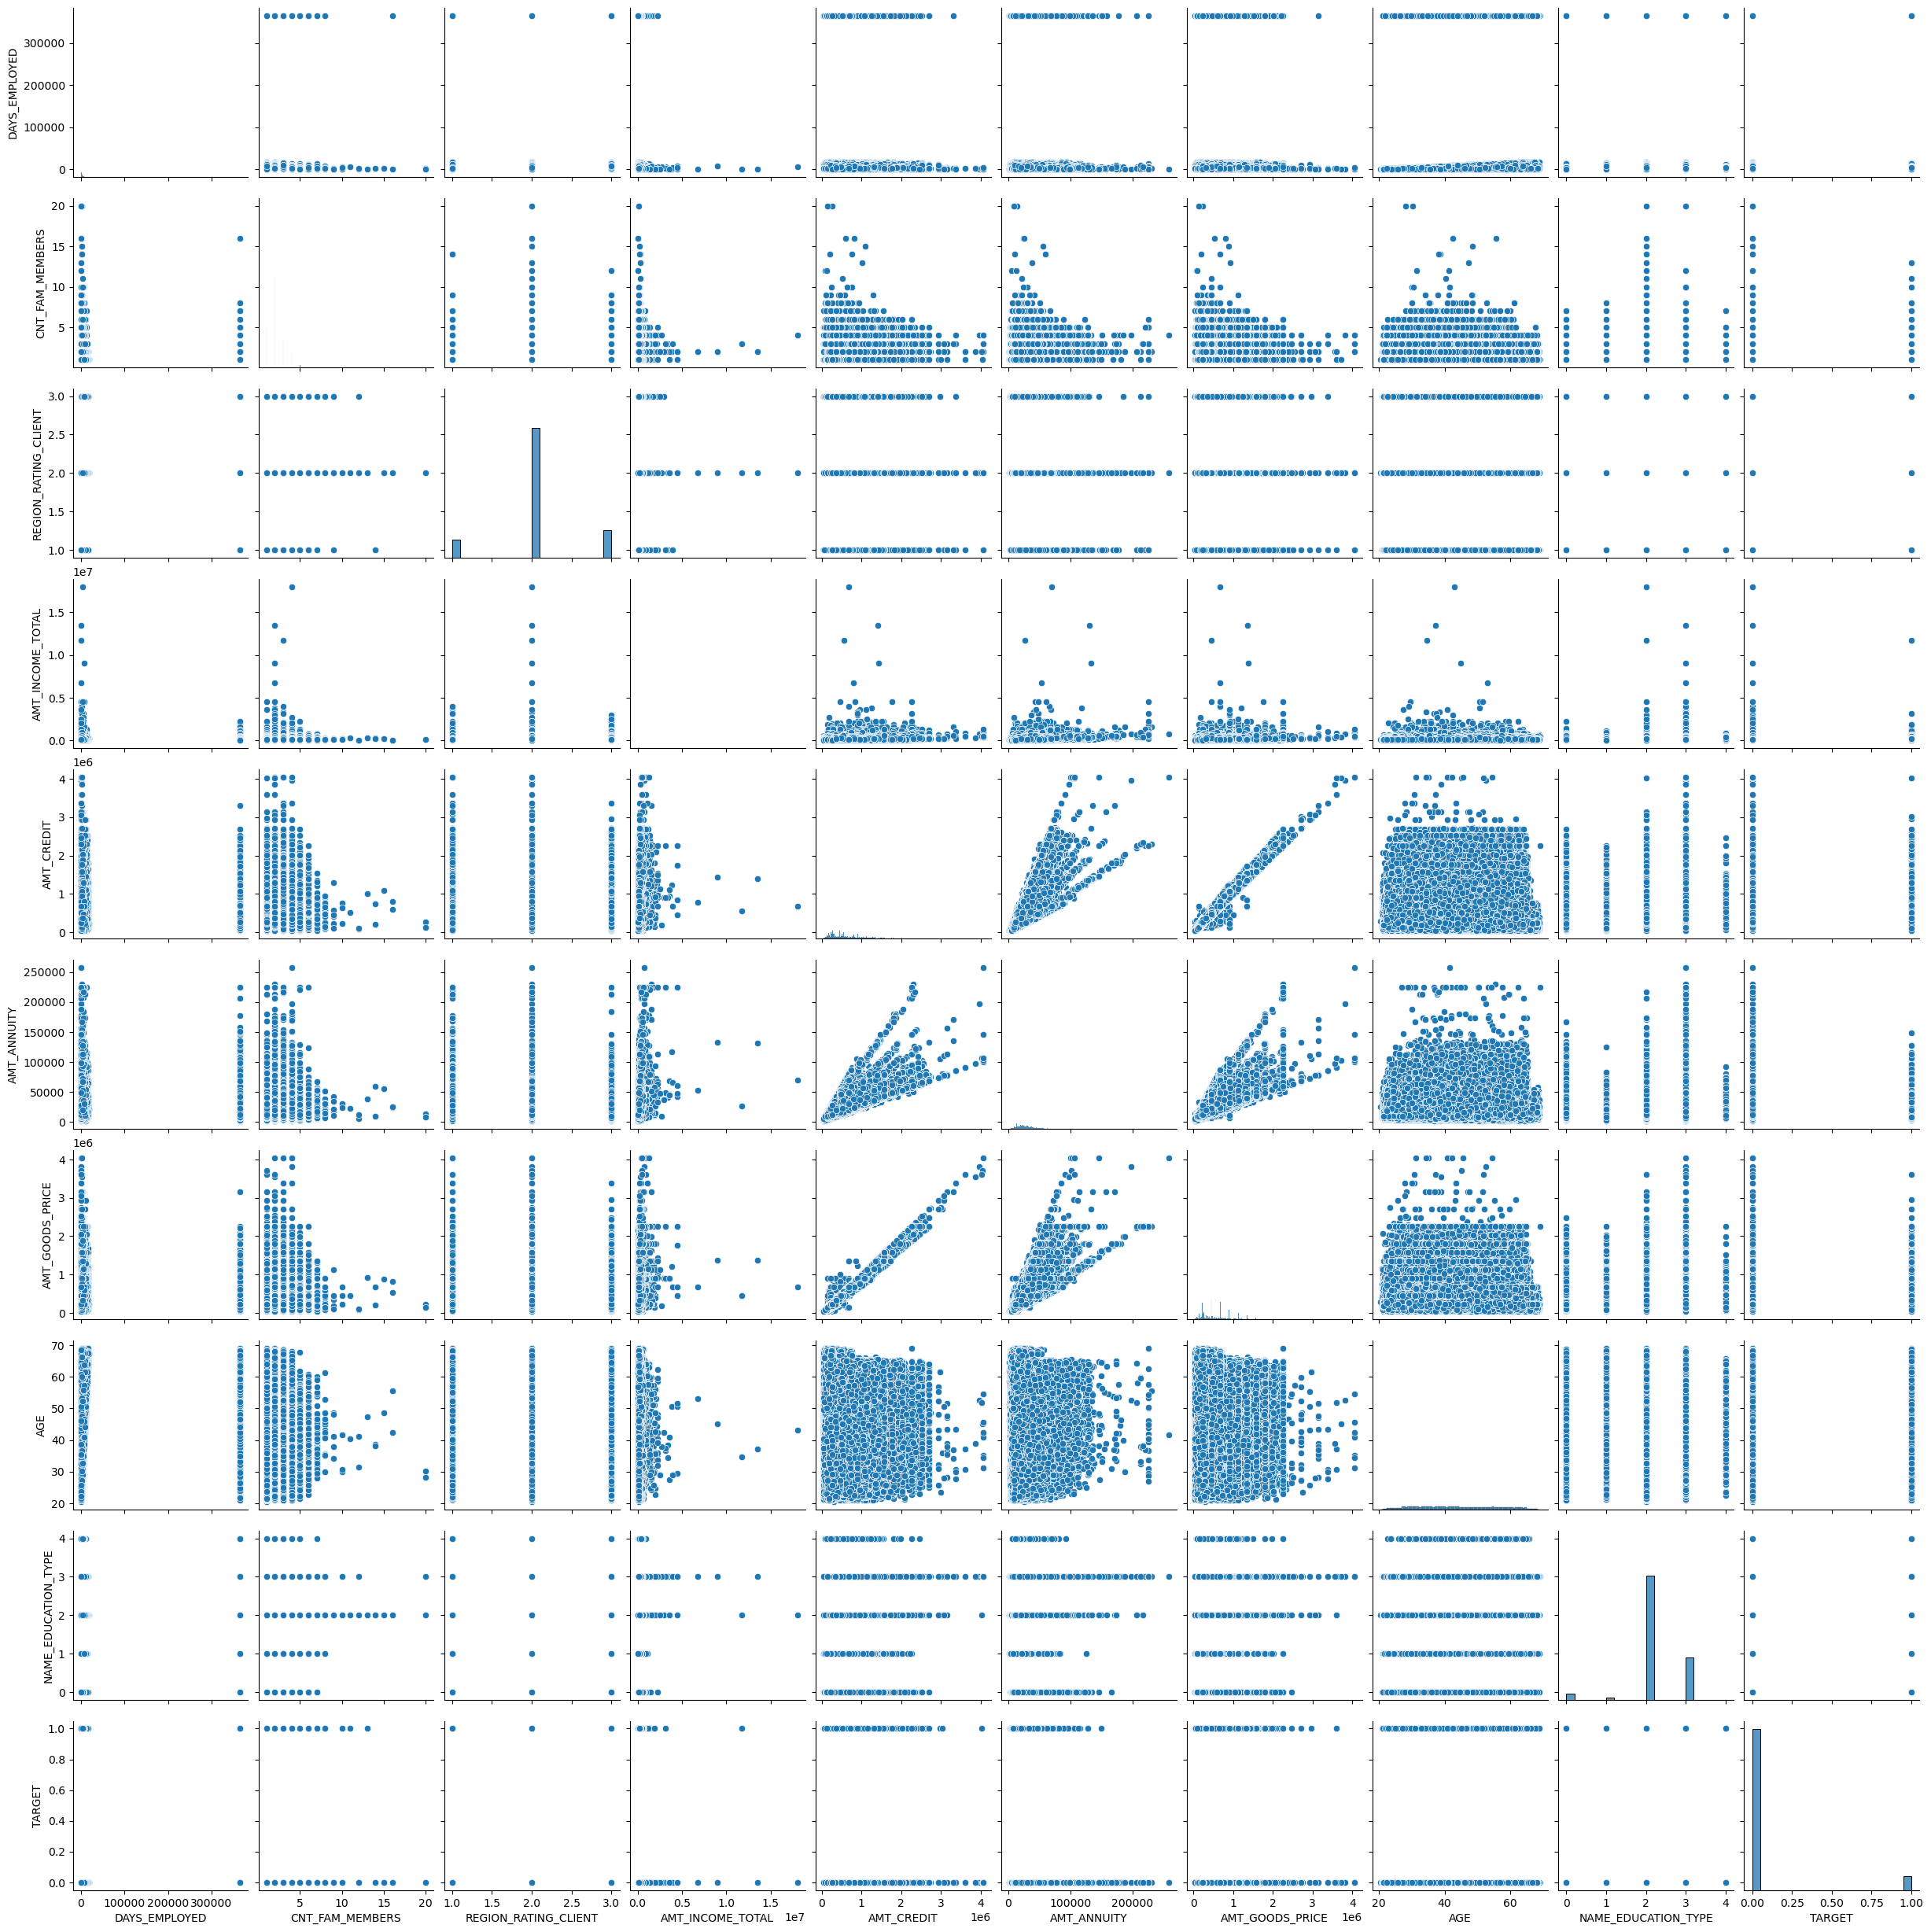

In [104]:
sns.pairplot(df[all_cols + ['TARGET']])
plt.show()

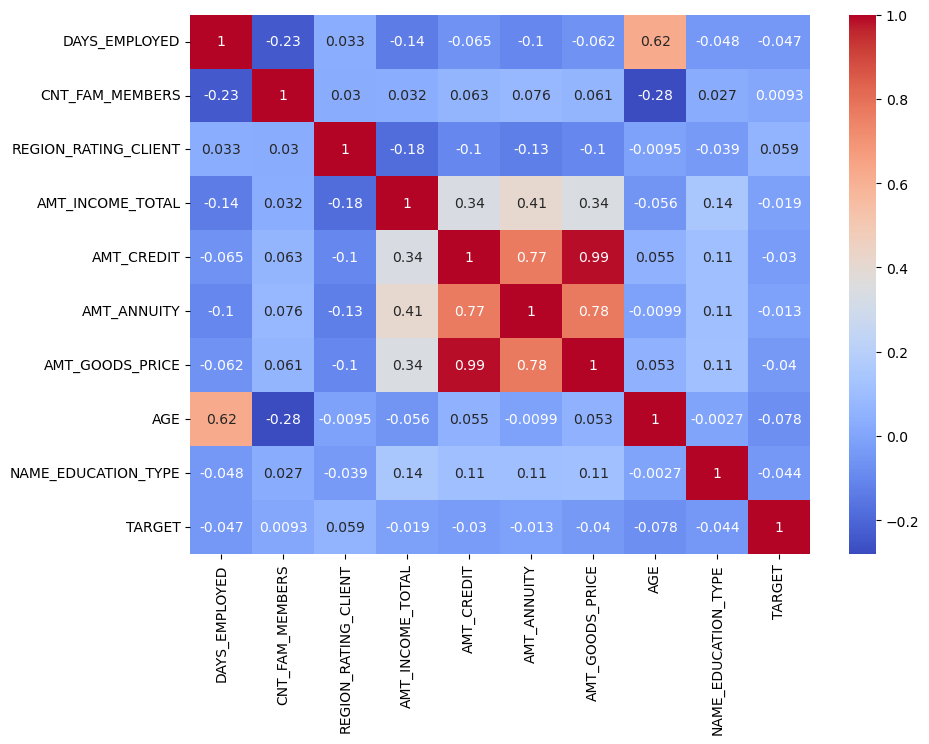

In [105]:
plt.figure(figsize=(10,7))
sns.heatmap(df[all_cols+['TARGET']].corr(),annot = True,cmap='coolwarm')
plt.show()

In [106]:
right_skew_col = ['DAYS_EMPLOYED','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
for i in right_skew_col:
    df[i] =  np.log(df[i]+ 0.0001)

In [107]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_Range,CREDIT_RANGE,AGE_GROUP
0,1,Cash loans,M,N,Y,0,12.218495,12.915579,10.114579,12.768542,Unaccompanied,Working,2,Single / not married,House / apartment,0.018801,25.9,6.456770,3648,2120,1,1,0,1,1,0,1,2,2,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2,1134,1,1,0,0,0
1,0,Cash loans,F,N,N,0,12.506177,14.072864,10.482864,13.937286,Family,State servant,3,Married,House / apartment,0.003541,45.9,7.080027,1186,291,1,1,0,1,1,0,2,1,1,11,0,0,0,0,0,0,School,0.622246,0.510885,0,828,1,0,1,1,1
2,0,Revolving loans,M,Y,Y,0,11.119883,11.813030,8.817298,11.813030,Unaccompanied,Working,2,Single / not married,House / apartment,0.010032,52.2,5.416101,4260,2531,1,1,1,1,1,0,1,2,2,9,0,0,0,0,0,0,Government,0.555912,0.729567,0,815,0,0,2,2,2
3,0,Cash loans,F,N,Y,0,11.813030,12.652944,10.298448,12.601487,Unaccompanied,Working,2,Civil marriage,House / apartment,0.008019,52.1,8.019284,9833,2437,1,1,0,1,0,0,2,2,2,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510885,0,617,1,0,3,0,2
4,0,Cash loans,M,N,Y,0,11.707670,13.148031,9.992665,13.148031,Unaccompanied,Working,2,Single / not married,House / apartment,0.028663,54.6,8.018955,4311,3458,1,1,0,1,0,0,1,2,2,11,0,0,0,0,1,1,Religion,0.322738,0.510885,0,1106,0,0,3,3,2


### Nominal Encoding

In [108]:
df = pd.get_dummies(df,columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE',
                             'NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','ORGANIZATION_TYPE'],drop_first = True)                          

In [109]:
df.replace({True: 1, False: 0}, inplace=True)

In [110]:
df.sample(4)

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,AGE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_Range,CREDIT_RANGE,AGE_GROUP,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
28795,0,0,12.218495,12.100712,9.104980,12.100712,2,0.030755,61.8,12.808318,2765,3979,1,0,0,1,0,0,2,2,2,11,0,0,0,0,0,0,0.681547,0.577969,0,288,0,2,0,2,2,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
109183,0,0,11.813030,13.012031,10.306299,12.911642,2,0.030755,28.5,4.912656,4960,2369,1,1,1,1,0,0,1,2,2,11,0,1,1,0,1,1,0.616829,0.626304,0,328,1,4,3,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
94856,0,1,12.854484,13.710150,10.824885,13.710150,3,0.018209,34.3,7.827241,1581,622,1,1,0,1,0,0,3,3,3,11,0,0,0,0,0,0,0.506666,0.634706,1,1226,0,3,1,4,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0

In [111]:
X = df.drop(columns = 'TARGET')
y = df['TARGET']

In [112]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

## PCA

In [113]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc  = sc.transform(X_test)

In [114]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components =0.95)
X_train_pca = pca_model.fit_transform(X_train_sc)
X_test_pca = pca_model.transform(X_test_sc)

In [115]:
pca_model.explained_variance_ratio_

array([0.05016689, 0.03285686, 0.02497009, 0.01992255, 0.01938481,
       0.01661293, 0.01589253, 0.01536493, 0.01402063, 0.01306345,
       0.01198401, 0.01148235, 0.01119834, 0.01094215, 0.01052966,
       0.01007256, 0.00965014, 0.00947589, 0.00930428, 0.00916726,
       0.00905305, 0.00897877, 0.00890388, 0.00888416, 0.00880923,
       0.00875628, 0.00875046, 0.00870484, 0.00868299, 0.00866844,
       0.00866301, 0.00864522, 0.00863516, 0.00862724, 0.0086164 ,
       0.00860505, 0.00859686, 0.00858825, 0.00857762, 0.00856344,
       0.0085604 , 0.00855762, 0.00854577, 0.00853839, 0.00853221,
       0.00852593, 0.00851822, 0.0085142 , 0.00851204, 0.00850875,
       0.00850755, 0.00850343, 0.00850096, 0.00849741, 0.00849226,
       0.00849211, 0.00849042, 0.00848919, 0.00848704, 0.00848545,
       0.00848479, 0.0084817 , 0.00848142, 0.00847768, 0.00847408,
       0.00847038, 0.00846908, 0.008467  , 0.00845803, 0.00845084,
       0.00842694, 0.00840945, 0.00840573, 0.00839256, 0.00837

# Model -1 Logistic regression

In [116]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [117]:
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)
print('train accuracy',accuracy_score(y_train , y_pred_train))
print('test accuracy',accuracy_score(y_test,y_pred_test))
print('cross val score ',cross_val_score(log_reg,X_train , y_train , cv = 5 ).mean())

train accuracy 0.9197643382592279
test accuracy 0.9172267881845553
cross val score  0.919768407181539


# Model -2 Decision Tree

In [118]:
estimator = DecisionTreeClassifier(random_state = 0)

param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [1,2,3,4,5,6]}

grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')

grid.fit(X_train, y_train)
grid.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [119]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [120]:
s1 = pd.DataFrame(grid.best_estimator_.feature_importances_,
                   index = X_train.columns.to_list(),columns = ['Importance'])
imp_features = s1[s1['Importance']>0].index.to_list()
X_imp = X[imp_features
X_train,X_test,y_train,y_test  = train_test_split(X_imp,y, random_state = 9 , test_size = 0.2)

In [126]:
# model with best hyperparameter 
final_dt_model = dt_default = DecisionTreeClassifier(criterion = 'gini',max_depth = 3,random_state = 0)
final_dt_model.fit(X_train,y_train)

y_pred_train = final_dt_model.predict(X_train)
y_pred_test = final_dt_model.predict(X_test)

print('train aaccuracy',accuracy_score(y_train,y_pred_train))
print('test accuracy is :', accuracy_score(y_test,y_pred_test))
print('cross validation score is :',cross_val_score(final_dt_model,X_train,y_train,cv = 5).mean())

train aaccuracy 0.9193778074344118
test accuracy is : 0.9188054357555537
cross validation score is : 0.9193778074290732


# MOdel -3 Random Forest

In [127]:
estimator = RandomForestClassifier(random_state = 0) # lock the random state no for the fix the data

param_grid = {'n_estimators':list(range(1,10))} # we can use bootstrap here

grid = GridSearchCV(estimator,param_grid,cv = 5,scoring = 'accuracy')

grid.fit(X_train,y_train)

grid.best_params_

{'n_estimators': 8}

In [128]:
grid.best_estimator_

RandomForestClassifier(n_estimators=8, random_state=0)

In [130]:
s1 = pd.DataFrame(grid.best_estimator_.feature_importances_,
                   index = X_train.columns.to_list(),columns = ['Importance'])
imp_features = s1[s1['Importance']>0].index.to_list()
X_imp = X[imp_features]
X_train,X_test,y_train,y_test  = train_test_split(X_imp,y, random_state = 9 , test_size = 0.2)

In [131]:
# model with best hyperparameter 
final_dt_model = dt_default = RandomForestClassifier(n_estimators = 8,random_state = 0)
final_dt_model.fit(X_train,y_train)

y_pred_train = final_dt_model.predict(X_train)
y_pred_test = final_dt_model.predict(X_test)

print('train aaccuracy',accuracy_score(y_train,y_pred_train))
print('test accuracy is :', accuracy_score(y_test,y_pred_test))
print('cross validation score is :',cross_val_score(final_dt_model,X_train,y_train,cv = 5).mean())

train aaccuracy 0.9815889265021809
test accuracy is : 0.9161526568475873
cross validation score is : 0.9169365601970562


# Model -4 ADA Boost

In [132]:
# model estimator
estimator = AdaBoostClassifier(random_state = 42) # lock the random state no for the fix the data 
# parameters grid
param_grid = {'n_estimators':list(range(1,3))} # we can use bootstrap here 
#grid search
grid = GridSearchCV(estimator,param_grid,cv = 5,scoring = 'accuracy')

grid.fit(X_train,y_train)
# best parameter for adabost
grid.best_params_

{'n_estimators': 1}

In [133]:
grid.best_estimator_

AdaBoostClassifier(n_estimators=1, random_state=42)

In [135]:
s1 = pd.DataFrame(grid.best_estimator_.feature_importances_,
                   index = X_train.columns.to_list(),columns = ['Importance'])
imp_features = s1[s1['Importance']>0].index.to_list()
X_imp = X[imp_features]
X_train,X_test,y_train,y_test  = train_test_split(X_imp,y, random_state = 9 , test_size = 0.2)

In [136]:
# modeling 
adaboost = AdaBoostClassifier(n_estimators=1)
adaboost.fit(X_train,y_train)

# train accuracy 
y_pred_train = adaboost.predict(X_train)
print('train aaccuracy',accuracy_score(y_train,y_pred_train))

# cross validatoin score 
print('cross validation score is :',cross_val_score(adaboost,X_train,y_train,cv = 5).mean())

# test accuracy 
y_pred_test = adaboost.predict(X_test)
print('test accuracy is :', accuracy_score(y_test,y_pred_test))

train aaccuracy 0.9193778074344118
cross validation score is : 0.9193778074290732
test accuracy is : 0.9188054357555537


# Model -5 Gradient Boost

In [137]:
# model estimator
estimator = GradientBoostingClassifier(random_state = 42) # lock the random state no for the fix the data 
# parameters grid
param_grid = {'n_estimators':[8],
              'learning_rate':[0,0.1,0.2,0.3,0.4,0.5,1]} # we can use bootstrap here 
#grid search
grid = GridSearchCV(estimator,param_grid,cv = 5,scoring = 'accuracy')

grid.fit(X_train,y_train)
# best parameter for adabost
grid.best_params_

{'learning_rate': 0, 'n_estimators': 8}

In [138]:
grid.best_estimator_

GradientBoostingClassifier(learning_rate=0, n_estimators=8, random_state=42)

In [140]:
s1 = pd.DataFrame(grid.best_estimator_.feature_importances_,
                   index = X_train.columns.to_list(),columns = ['Importance'])
imp_features = s1[s1['Importance']>0].index.to_list()
X_imp = X[imp_features]
X_train,X_test,y_train,y_test  = train_test_split(X_imp,y, random_state = 9 , test_size = 0.2)

In [141]:
# modeling 
gradient_decent =  GradientBoostingClassifier(learning_rate=0, n_estimators=8, random_state=42)
gradient_decent.fit(X_train,y_train)

# train accuracy 
y_pred_train = gradient_decent.predict(X_train)
print('train aaccuracy',accuracy_score(y_train,y_pred_train))

# cross validatoin score 
print('cross validation score is :',cross_val_score(gradient_decent,X_train,y_train,cv = 5).mean())

# test accuracy 
y_pred_test = gradient_decent.predict(X_test)
print('test accuracy is :', accuracy_score(y_test,y_pred_test))

train aaccuracy 0.9193778074344118
cross validation score is : 0.9193778074290732
test accuracy is : 0.9188054357555537


# Model -6 XG boost

In [142]:
# model estimator
estimator = XGBClassifier(random_state = 42) # lock the random state no for the fix the data 
# parameters grid
param_grid = {'n_estimators':list(range(1,10)),
              'learning_rate':[0,0.1,0.2],
             'max_depth':[3,4,5],
             'gamma':[0,0.15,]} # we can use bootstrap here 
#grid search
grid = GridSearchCV(estimator,param_grid,cv = 5,scoring = 'accuracy')

grid.fit(X_train,y_train)
# best parameter for adabost
grid.best_params_

{'gamma': 0, 'learning_rate': 0, 'max_depth': 3, 'n_estimators': 1}

In [143]:
grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1,
              n_jobs=None, num_parallel_tree=None, ...)

In [145]:
s1 = pd.DataFrame(grid.best_estimator_.feature_importances_,
                   index = X_train.columns.to_list(),columns = ['Importance'])
imp_features = s1[s1['Importance']>0].index.to_list()
X_imp = X[imp_features]
X_train,X_test,y_train,y_test  = train_test_split(X_imp,y, random_state = 9 , test_size = 0.2)

In [146]:
# modeling 
xg_boost =  XGBClassifier(gamma = 0,learning_rate=0,max_depth = 3,n_estimators= 1)
xg_boost.fit(X_train,y_train)

# train accuracy 
y_pred_train = xg_boost.predict(X_train)
print('train aaccuracy',accuracy_score(y_train,y_pred_train))

# cross validatoin score 
print('cross validation score is :',cross_val_score(xg_boost,X_train,y_train,cv = 5).mean())

# test accuracy 
y_pred_test = xg_boost.predict(X_test)
print('test accuracy is :', accuracy_score(y_test,y_pred_test))

train aaccuracy 0.9193778074344118
cross validation score is : 0.9193778074290732
test accuracy is : 0.9188054357555537
